In [1]:
from graph_utils import *

In [2]:
# Loading the graphs
path = "data/6_gg_ru.npy" # Path to a file with graph model
corp = (np.load(path, allow_pickle=True)).tolist()
graph_embed = Graph(vertices=corp) #Graph with embeddings of words (basically, the only use is to extract SVD embeddings)
graph = convert_graph_to_networkx(corp)

100%|██████████| 1867261/1867261 [00:10<00:00, 176784.45it/s]


In [3]:
def euclid_distance(graph: Graph, first_word: str, second_word: str) -> np.float64:
    """
    Calculate Euclid distance from first_word to second_word

    Parameters
    ----------
    first_word: str,
    second_word: str

    Returns
    -------
    euclid_distance : np.float64
    """
    
    first_vertex = graph.vertices[first_word].vector
    second_vertex = graph.vertices[second_word].vector
    return np.linalg.norm(first_vertex - second_vertex)

In [4]:
def get_shortest_path_length(graph: nx.classes.graph.Graph, graph_embed: Graph, text: str):
    # TODO: make it more optimized. Right now it's quite computationally heavy.
    """ 
    A function that calculates the lengths of the shortest path of an anecdote in a graph
    """
    graph_path = go_through_text(text, graph=graph)
    # print(graph_path)
    sp_list = convert_text_shortest_paths_to_text_words_path(graph_path)
    path_num = 0
    for i in range(1, len(sp_list)):
        path_num += euclid_distance(graph_embed, sp_list[i], sp_list[i-1])
    return path_num, len(sp_list)

In [5]:
def parse(x: str) -> str:
    """
    Special utility function which is used to parse the strings (which represent the jokes)

    Args:
    x (str): a string that is presented in a way "['word_1', 'word_2', ..., 'word_N']"

    Returns:
    str: a string that looks like "word_1 word_2 ... word_N "
    """
    x = x[1:-1]
    x = x.replace("\'", "")
    temp = x.split(", ")
    return " ".join(temp)

In [42]:
joke = "косметика одинаково полезный особенно вредный здоровье помада рубашка"
get_shortest_path_length(graph, graph_embed, joke)

[('тесть', 'воровство', 'спрашиваться', 'выгодно', 'выгодный', 'подробно', 'участвовать', 'исключение', 'определенный', 'зрение', 'большинство', 'факт', 'личный', 'возможность', 'подобный', 'поэтому'), ('поэтому', 'происходить', 'представлять', 'называть'), ('называть', 'настоящий', 'кроме', 'особенно', 'бумага', 'трудно', 'приятель', 'здоровье', 'присылать', 'уважать', 'поздравлять', 'советовать', 'выучивать', 'безобразие', 'мерзость', 'вызываться', 'фокусник', 'окрестить', 'портиться', 'гигиена', 'сверять', 'рекордный', 'тестировать'), ('тестировать', 'стимулировать', 'разовый', 'групповой', 'стабильность', 'дискуссия', 'комментировать', 'подразумевать', 'инцидент', 'банальный', 'аргумент', 'официально', 'предыдущий'), ('предыдущий', 'перспектива', 'владелец', 'складываться', 'версия'), ('версия', 'означать', 'прошлое', 'черта', 'ужасный', 'радость', 'слеза', 'милый', 'жена')]


(6.561736121454756, 65)

In [2]:
df = pd.read_csv("../data/Russian_Anecdotes/lemmatized_russian.csv")

In [8]:
df.head()

,lemmatized
0,"['колобок', 'это', 'сказка', 'взросление', 'па..."
1,"['мы', 'все', 'таки', 'удаться', 'распространи..."
2,"['быть', 'оценить', 'состояние', 'российский',..."
3,"['есть', 'свидетельство', 'рождение', 'есть', ..."
4,"['пожарный', 'оперативно', 'потушить', 'здание..."


In [9]:
id = []
length = []
number_of_nodes = []

In [ ]:
for i, row in tqdm(df.iterrows()):
    if (487 <= i < 1000) and (row['lemmatized'] != "['nan']"):
        try:
            joke = parse(row["lemmatized"])
            l, n = get_shortest_path_length(graph, graph_embed, joke)
            id.append(i)
            length.append(l)
            number_of_nodes.append(n)
        except:
            print("AN ERROR OCCURED ON ROW", i)

In [19]:
print(len(number_of_nodes))

NameError: name 'number_of_nodes' is not defined

In [135]:
df_results = pd.DataFrame({
    "id": id, 
    "length": length,
    "N_nodes": number_of_nodes,
}, index=id)


In [136]:
df_results.head(10)

,id,length,N_nodes
0,0,94.143181,250
1,1,4.846424,62
2,2,1.011491,30
3,3,13.170483,71
4,4,1.586293,41
5,5,47.311841,151
6,6,32.857813,217
7,7,143.369420,136
8,8,8.360460,69
9,9,3.134427,9


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='length', ylabel='Count'>

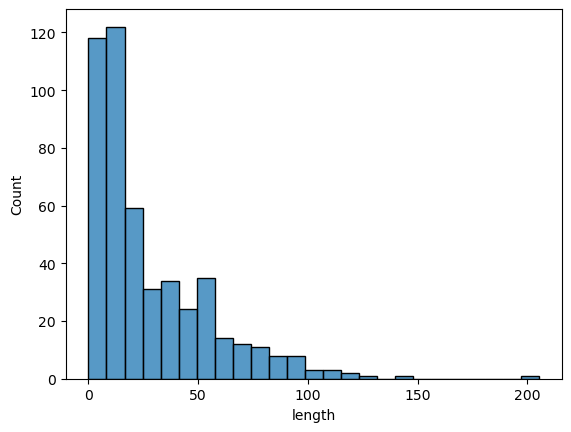

In [140]:
sns.histplot(df_results['length'])

In [61]:
df_results.to_csv("360_Jokes_GG.csv")

In [66]:
df_results.describe().T

,count,mean,std,min,25%,50%,75%,max
id,358.0,180.315642,104.449998,0.0,90.250000,180.500000,270.750000,360.000000
length,358.0,28.502567,28.151589,0.0,8.927857,17.431948,40.821663,205.523875
N_nodes,358.0,102.259777,82.855969,1.0,54.250000,84.000000,123.750000,652.000000


In [72]:
from scipy.stats import expon

In [176]:
np.random.seed(3)
rv = expon(loc=4, scale=26)

sample = rv.rvs(size=500)

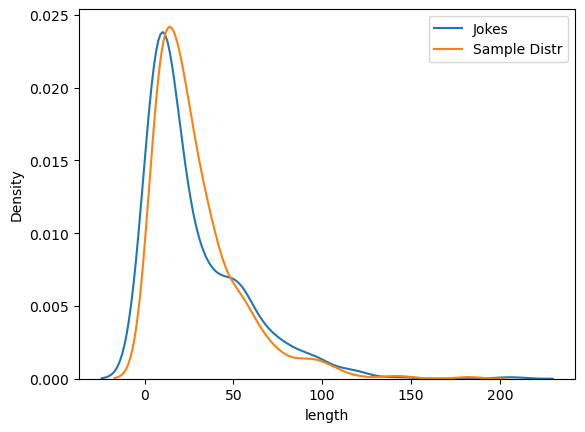

In [177]:
sns.kdeplot(df_results['length'], label="Jokes")
sns.kdeplot(sample, label="Sample Distr")
plt.legend()

In [3]:
results = pd.read_csv("data/results/360_Jokes_GG.csv")

In [6]:
n_words = []

for i, row in df.iterrows():
    if 0 <= i < results.shape[0]:
        joke = parse(row["lemmatized"])
        n_words.append(len(joke.split()))

In [8]:
results['normalized_length'] = results['length'] / n_words

In [10]:
results.to_csv("data/results/normalized_results.csv")

(0.0, 30.0)

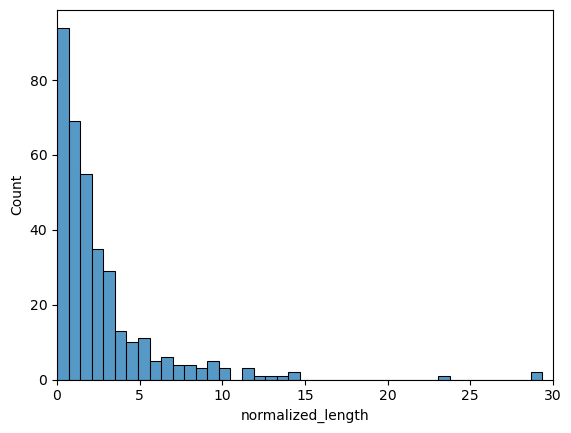

In [18]:
sns.histplot(results[results['normalized_length'] > 0]['normalized_length'])
plt.xlim(0, 30)

In [20]:
try:
    a = 5 / 0
except:
    print("govno")

govno
